# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#This doesn't actually guarantee sufficient count, but 631 seems large enough

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#initializing variables and lists ahead of API loop
url = "http://api.openweathermap.org/data/2.5/weather?"
citylist = []
cloudy = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []
#API loop to append city weather data to our lists
i=1
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial&format=json"
    weather_response = requests.get(query_url)
    if weather_response.status_code == 200:
        print("Processing Record " + str(i) + " | " + str(city))
        i += 1
        weather_json = weather_response.json()
        citylist.append(city)
        cloudy.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp_max'])
        wind.append(weather_json['wind']['speed'])
        
    #if the json request doesn't say "OK" (code 200), skip the city
    else:
        print("City not found. Skipping...")

Processing Record 1 | kodiak
Processing Record 2 | xiuyan
Processing Record 3 | saint-philippe
Processing Record 4 | port blair
Processing Record 5 | port alfred
Processing Record 6 | sabha
Processing Record 7 | corigliano calabro
Processing Record 8 | geraldton
Processing Record 9 | yellowknife
City not found. Skipping...
Processing Record 10 | ahipara
Processing Record 11 | shache
Processing Record 12 | khatanga
Processing Record 13 | oksfjord
Processing Record 14 | rundu
Processing Record 15 | mataura
Processing Record 16 | walvis bay
Processing Record 17 | dhidhdhoo
City not found. Skipping...
Processing Record 18 | lesnoye
Processing Record 19 | takoradi
Processing Record 20 | jamestown
Processing Record 21 | puerto ayora
Processing Record 22 | praya
Processing Record 23 | inhambane
City not found. Skipping...
Processing Record 24 | natal
Processing Record 25 | vaini
Processing Record 26 | liverpool
Processing Record 27 | kapaa
Processing Record 28 | jalu
Processing Record 29 | at

Processing Record 229 | makakilo city
Processing Record 230 | mayskiy
Processing Record 231 | cayenne
Processing Record 232 | kruisfontein
Processing Record 233 | diffa
Processing Record 234 | guamuchil
Processing Record 235 | lagoa
Processing Record 236 | dong hoi
Processing Record 237 | gusau
Processing Record 238 | catuday
Processing Record 239 | beloha
Processing Record 240 | luderitz
Processing Record 241 | verkhoyansk
City not found. Skipping...
Processing Record 242 | muisne
Processing Record 243 | port lincoln
Processing Record 244 | aviemore
Processing Record 245 | mapiripan
Processing Record 246 | codrington
City not found. Skipping...
Processing Record 247 | guerrero negro
Processing Record 248 | fortuna
Processing Record 249 | ostrovnoy
Processing Record 250 | kolokani
Processing Record 251 | dwarka
Processing Record 252 | noyabrsk
Processing Record 253 | kamenka
Processing Record 254 | leningradskiy
Processing Record 255 | veshenskaya
Processing Record 256 | colac
City not

Processing Record 457 | moron
Processing Record 458 | ola
Processing Record 459 | estelle
Processing Record 460 | kuppam
Processing Record 461 | whitehorse
Processing Record 462 | huadian
City not found. Skipping...
Processing Record 463 | bardsir
Processing Record 464 | bad doberan
Processing Record 465 | olga
Processing Record 466 | kaeo
Processing Record 467 | santa cruz
Processing Record 468 | kargasok
Processing Record 469 | raymondville
Processing Record 470 | wakkanai
Processing Record 471 | saint anthony
Processing Record 472 | sakiai
Processing Record 473 | pervouralsk
Processing Record 474 | fomboni
Processing Record 475 | namibe
Processing Record 476 | balabac
City not found. Skipping...
Processing Record 477 | nouadhibou
Processing Record 478 | atasu
Processing Record 479 | eureka
Processing Record 480 | kavieng
Processing Record 481 | coronel vivida
Processing Record 482 | berea
Processing Record 483 | maragogi
Processing Record 484 | dongsheng
Processing Record 485 | tiks

In [10]:
#put our data lists into a DataFrame
cityweather = pd.DataFrame({'City' : citylist,
                            'Cloudiness' : cloudy,
                            'Country' : country,
                            'Date' : date,
                            'Humidity' : humidity,
                            'Lat' : lat,
                            'Lng' : lng,
                            'Max Temp' : temp,
                            'Wind Speed' : wind})
#output DataFrame to csv for safekeeping
cityweather.to_csv(path_or_buf='City Weather.csv',index=False)
#show that we have enough rows to satisfy the >500 requirement
cityweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
City          567 non-null object
Cloudiness    567 non-null int64
Country       567 non-null object
Date          567 non-null int64
Humidity      567 non-null int64
Lat           567 non-null float64
Lng           567 non-null float64
Max Temp      567 non-null float64
Wind Speed    567 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 40.0+ KB


In [11]:
#Displaying the DF for fun
cityweather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kodiak,1,US,1573346370,47,39.95,-94.76,55.99,8.05
1,xiuyan,96,CN,1573346659,66,40.29,123.27,43.83,7.05
2,saint-philippe,75,CA,1573346626,47,45.36,-73.48,36.00,11.41
3,port blair,50,IN,1573346467,74,11.67,92.75,81.48,3.94
4,port alfred,96,ZA,1573346659,88,-33.59,26.89,64.99,8.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

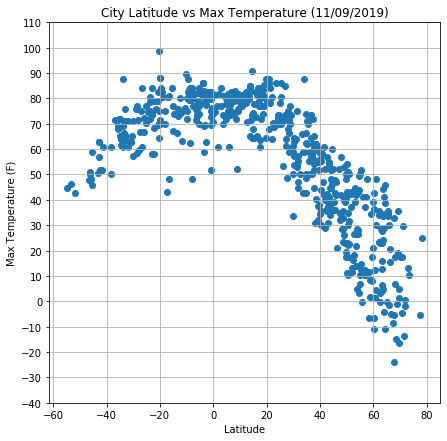

In [32]:
plt.figure(1, figsize=(7,7))
plt.scatter(cityweather['Lat'].tolist(), cityweather['Max Temp'].tolist())
plt.ylabel("Max Temperature (F)")
plt.yticks(np.arange(-40,120,step=10))
plt.xlabel("Latitude")
#The 21600 is to adjust GMT time to CST to show the correct access date
plt.title("City Latitude vs Max Temperature (" + time.strftime('%m/%d/%Y',  time.gmtime(cityweather['Date'][0] - 21600)) + ")")
plt.grid()
plt.savefig("Lat vs Temp.png")

#### Latitude vs. Humidity Plot

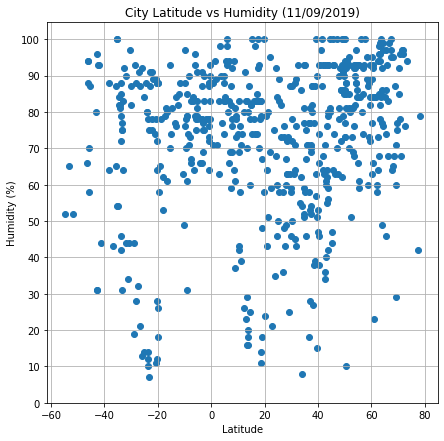

In [31]:
plt.figure(2, figsize=(7,7))
plt.scatter(cityweather['Lat'].tolist(), cityweather['Humidity'].tolist())
plt.ylabel("Humidity (%)")
plt.yticks(np.arange(0,110,step=10))
plt.xlabel("Latitude")
#The 21600 is to adjust GMT time to CST to show the correct access date
plt.title("City Latitude vs Humidity (" + time.strftime('%m/%d/%Y',  time.gmtime(cityweather['Date'][0] - 21600)) + ")")
plt.grid()
plt.savefig("Lat vs Humidity.png")

#### Latitude vs. Cloudiness Plot

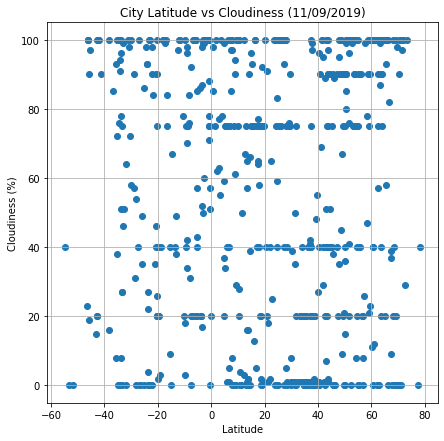

In [29]:
plt.figure(3, figsize=(7,7))
plt.scatter(cityweather['Lat'].tolist(), cityweather['Cloudiness'].tolist())
plt.ylabel("Cloudiness (%)")
plt.yticks(np.arange(0,110,step=20))
plt.xlabel("Latitude")
#The 21600 is to adjust GMT time to CST to show the correct access date
plt.title("City Latitude vs Cloudiness (" + time.strftime('%m/%d/%Y',  time.gmtime(cityweather['Date'][0] - 21600)) + ")")
plt.grid()
plt.savefig("Lat vs Cloud.png")

#### Latitude vs. Wind Speed Plot

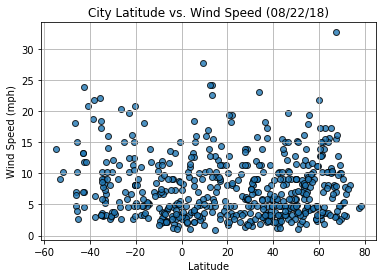

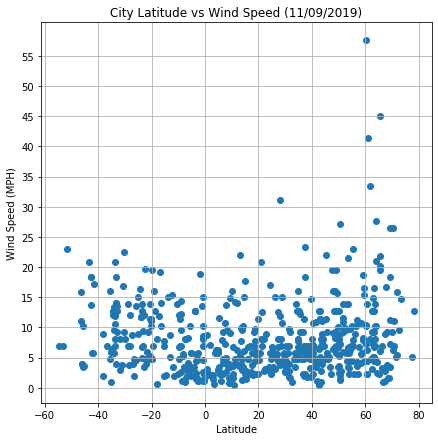

In [38]:
plt.figure(4, figsize=(7,7))
plt.scatter(cityweather['Lat'].tolist(), cityweather['Wind Speed'].tolist())
plt.ylabel("Wind Speed (MPH)")
plt.yticks(np.arange(0,60,step=5))
plt.xlabel("Latitude")
#The 21600 is to adjust GMT time to CST to show the correct access date
plt.title("City Latitude vs Wind Speed (" + time.strftime('%m/%d/%Y',  time.gmtime(cityweather['Date'][0] - 21600)) + ")")
plt.grid()
plt.savefig("Lat vs Wind.png")